In [ ]:
## in this session i am going to try cnn models with mentioned dataset and test it in the new specific dataset

In [ ]:
from google.colab import files
upload = files.upload()

Saving utkface_train.zip to utkface_train.zip


In [ ]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = "utkface_train.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("utkface_dataset")

In [ ]:
from google.colab import files
upload = files.upload()

Saving specific_dataset.zip to specific_dataset.zip


In [ ]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = "specific_dataset.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("test_dataset")

In [ ]:
## in 'cnn models+utkface+ourdataset+CHG' i determined the cropted images and there wasn't any.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
import torch

In [ ]:
## deleting the folders that you don't want

import os
import shutil

# Define the paths to the train and val folders within utkface_train
train_dir = "/content/utkface_dataset/utkface_train/train"
val_dir = "/content/utkface_dataset/utkface_train/val"

# Delete the train and val folders
shutil.rmtree(train_dir)
shutil.rmtree(val_dir)

In [ ]:
## splitting to the train and validation

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# The dataset directory
input_folder = '/content/utkface_dataset/utkface_train'
# splitted dataset directory
output = 'splitted_dataset'

# Split with a ratio of 80-20 train and validation
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

Copying files: 13207 files [00:01, 7218.39 files/s]


In [ ]:
## To count the number of images in each ethnicity category (asian, black, white, indian)
# within the train and val directories, you can iterate through each ethnicity directory
# and count the images.

In [ ]:
import os

train_dir = "/content/splitted_dataset/train"
val_dir = "/content/splitted_dataset/val"

ethnicities = ['asian', 'black', 'indian', 'white']

def count_images_in_ethnicity(directory):
    ethnicity_counts = {}
    for ethnicity in ethnicities:
        ethnicity_dir = os.path.join(directory, ethnicity)
        num_images = len(os.listdir(ethnicity_dir))
        ethnicity_counts[ethnicity] = num_images
    return ethnicity_counts

train_ethnicity_counts = count_images_in_ethnicity(train_dir)
val_ethnicity_counts = count_images_in_ethnicity(val_dir)

print("Train Ethnicity Counts:", train_ethnicity_counts)
print("Validation Ethnicity Counts:", val_ethnicity_counts)

Train Ethnicity Counts: {'asian': 1630, 'black': 2201, 'indian': 1907, 'white': 4826}
Validation Ethnicity Counts: {'asian': 408, 'black': 551, 'indian': 477, 'white': 1207}


In [ ]:
## VGG16

In [ ]:
## train andvalidation on a utkface dataset and test in our dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define paths to the dataset directories
train_dir = '/content/splitted_dataset/train'
validation_dir = '/content/splitted_dataset/val'
test_dir = '/content/test_dataset/specific_dataset'


num_classes = 4

# Define image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/20
330/330 [==============================] - 18s 56ms/step - loss: 0.8008 - accuracy: 0.6795 - val_loss: 0.7267 - val_accuracy: 0.7207
Epoch 2/20
330/330 [==============================] - 19s 57ms/step - loss: 0.6993 - accuracy: 0.7274 - val_loss: 0.6883 - val_accuracy: 0.7470
Epoch 3/20
330/330 [==============================] - 17s 52ms/step - loss: 0.6538 - accuracy: 0.7469 - val_loss: 0.6803 - val_accuracy: 0.7485
Epoch 4/20
330/330 [==============================] - 18s 55ms/step - loss: 0.5957 - accuracy: 0.7729 - val_loss: 0.6546 - val_accuracy: 0.7588
Epoch 5/20
330/330 [==============================] - 19s 57ms/step - loss: 0.5597 - accuracy: 0.7895 - val_loss: 0.6278 - val_accuracy: 0.7671
Epoch 6/20
330/330 [==============================] - 20s 61ms/step - loss: 0.5239 - accuracy: 0.8019 - val_loss: 0.6176 - val_accuracy: 0.7675
Epoch 7/20
330/330 [==============================] - 18s 54ms/step - loss: 0.4923 - accuracy: 0.8203 - val_loss: 0.6044 - val_accuracy:

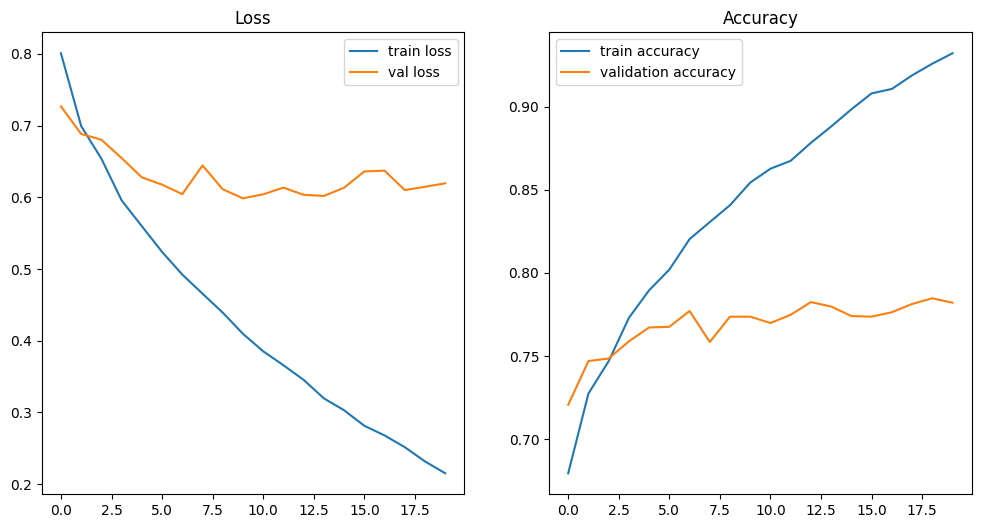

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# **Rescaling the test dataset**

In [ ]:
## i train the model one more time with 20 epochs , this time i change the test set , i use test.datagen to rescale the images on the test set

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/20
330/330 [==============================] - 18s 53ms/step - loss: 0.2082 - accuracy: 0.9314 - val_loss: 0.6276 - val_accuracy: 0.7820
Epoch 2/20
330/330 [==============================] - 17s 52ms/step - loss: 0.1909 - accuracy: 0.9408 - val_loss: 0.6310 - val_accuracy: 0.7835
Epoch 3/20
330/330 [==============================] - 17s 52ms/step - loss: 0.1775 - accuracy: 0.9454 - val_loss: 0.6252 - val_accuracy: 0.7866
Epoch 4/20
330/330 [==============================] - 17s 52ms/step - loss: 0.1674 - accuracy: 0.9515 - val_loss: 0.6644 - val_accuracy: 0.7797
Epoch 5/20
330/330 [==============================] - 17s 53ms/step - loss: 0.1554 - accuracy: 0.9554 - val_loss: 0.6611 - val_accuracy: 0.7767
Epoch 6/20
330/330 [==============================] - 18s 53ms/step - loss: 0.1522 - accuracy: 0.9550 - val_loss: 0.6680 - val_accuracy: 0.7835
Epoch 7/20
330/330 [==============================] - 18s 53ms/step - loss: 0.1349 - accuracy: 0.9603 - val_loss: 0.7004 - val_accuracy:

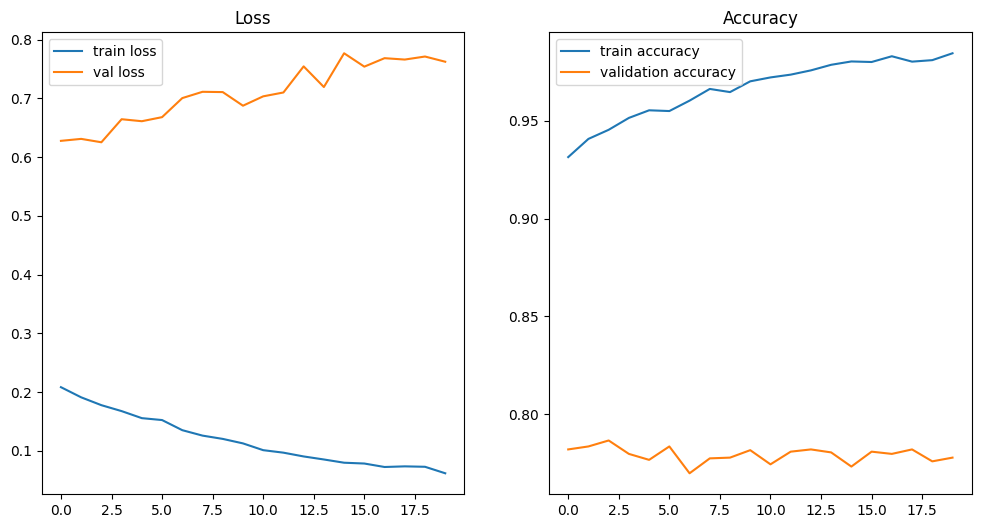

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## overfitting:
## where the training accuracy increases while the validation accuracy decreases, typically indicates overfitting. Here's what each trend may imply:

## Training Accuracy Increasing: As the training accuracy increases with each epoch, it suggests that the model is learning well from the training data and improving its ability to classify the training images correctly. However, as the model gets more complex or learns to memorize the training data, it may start to overfit.

## Validation Accuracy Decreasing: The decreasing validation accuracy suggests that the model's performance on unseen data (i.e., validation set) is deteriorating. This could happen due to overfitting, where the model starts to learn noise and irrelevant patterns from the training data that do not generalize well to unseen data.

## Validation Loss Increasing: The increasing validation loss further confirms the overfitting behavior. Loss is a measure of the model's prediction error, and a higher validation loss indicates that the model's predictions are becoming less accurate on the validation data.

## To address this issue, you can try the following:

# Regularization: Apply techniques like L2 regularization or dropout to prevent overfitting by penalizing large weights or randomly dropping units during training.
# Simplifying the Model: Reduce the complexity of the model architecture, such as decreasing the number of layers or units, to make it less prone to overfitting.
# Data Augmentation: Increase the diversity of your training data through techniques like rotation, flipping, scaling, or cropping to help the model generalize better to unseen data.
# Early Stopping: Monitor the validation loss during training and stop training when it starts to increase or no longer decreases. This prevents the model from overfitting to the training data.
# Hyperparameter Tuning: Experiment with different learning rates, batch sizes, optimizer types, etc., to find the optimal configuration that minimizes overfitting.
## By applying these techniques, you can often improve the model's ability to generalize to unseen data and mitigate the overfitting problem.

In [ ]:
## i want to use hyperparameter tuning:

In [ ]:
## Hyperparameter tuning involves adjusting the hyperparameters of your model and training process to find the optimal configuration that minimizes overfitting. Here's how you can perform hyperparameter tuning to minimize overfitting:

# Learning Rate: The learning rate controls the step size during the optimization process. If the learning rate is too high, the model may fail to converge, while if it's too low, the training may take longer or get stuck in local minima. You can try different learning rates and monitor the training and validation loss to find the optimal value.

# Regularization Strength: Regularization techniques like L2 regularization (weight decay) or dropout can help prevent overfitting by penalizing large weights or randomly dropping units during training. You can experiment with different regularization strengths to find the optimal balance between preventing overfitting and preserving model performance.

# Batch Size: The batch size determines the number of samples processed before updating the model's parameters. Larger batch sizes may lead to faster convergence but can also increase overfitting, while smaller batch sizes may provide more noise in the gradient estimates but may generalize better. Try different batch sizes and monitor the validation loss to find the optimal value.

# Model Complexity: The complexity of the model architecture, such as the number of layers, units, or filters, can affect its ability to generalize to unseen data. Simplifying the model by reducing its complexity can often help reduce overfitting. You can experiment with different architectures and monitor their performance on the validation set.

# Optimizer: Different optimizers like Adam, RMSprop, or SGD with momentum have different properties that can affect the model's training dynamics and generalization performance. Experiment with different optimizers and their parameters to find the optimal choice for your model.

# Early Stopping: Early stopping is a technique where you monitor the validation loss during training and stop training when it starts to increase or no longer decreases. This prevents the model from overfitting to the training data. You can use early stopping in combination with hyperparameter tuning to find the optimal number of epochs to train the model.

# Data Augmentation: Data augmentation techniques like rotation, flipping, scaling, or cropping can help increase the diversity of your training data and improve the model's ability to generalize. Experiment with different data augmentation strategies and monitor their impact on the validation loss.

##By systematically tuning these hyperparameters and monitoring their impact on the model's performance on the validation set, you can find the optimal configuration that minimizes overfitting and maximizes the model's ability to generalize to unseen data.


In [ ]:
## changing adam optimizer to SGD optimizer

# **Using SGD optimizer**

In [ ]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/20
330/330 [==============================] - 26s 76ms/step - loss: 0.0433 - accuracy: 0.9925 - val_loss: 0.7798 - val_accuracy: 0.7782
Epoch 2/20
330/330 [==============================] - 19s 57ms/step - loss: 0.0371 - accuracy: 0.9948 - val_loss: 0.7866 - val_accuracy: 0.7797
Epoch 3/20
330/330 [==============================] - 19s 57ms/step - loss: 0.0352 - accuracy: 0.9939 - val_loss: 0.7851 - val_accuracy: 0.7797
Epoch 4/20
330/330 [==============================] - 17s 52ms/step - loss: 0.0355 - accuracy: 0.9944 - val_loss: 0.7812 - val_accuracy: 0.7820
Epoch 5/20
330/330 [==============================] - 18s 55ms/step - loss: 0.0347 - accuracy: 0.9946 - val_loss: 0.7824 - val_accuracy: 0.7828
Epoch 6/20
330/330 [==============================] - 17s 53ms/step - loss: 0.0331 - accuracy: 0.9951 - val_loss: 0.7931 - val_accuracy: 0.7820
Epoch 7/20
330/330 [==============================] - 19s 59ms/step - loss: 0.0329 - accuracy: 0.9947 - val_loss: 0.8072 - val_accuracy:

In [ ]:
## test loss increased and test accuracy decreased compare with previous model

# **Adam optimiser- Lr=0.00005 , batch=128**

In [ ]:
## i want to change the batch size to 128
# regarding that change, i should change the learning rate in the optimiser

In [ ]:
# Define image dimensions
img_height, img_width = 128, 128
batch_size = 128

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes for ethnicities


In [ ]:
from tensorflow.keras.optimizers import Adam

# Define your optimizer with the adjusted learning rate
optimizer = Adam(learning_rate=0.00005)  # Adjusted learning rate

# Compile your model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/20
82/82 [==============================] - 32s 279ms/step - loss: 1.1304 - accuracy: 0.5193 - val_loss: 0.9019 - val_accuracy: 0.6344
Epoch 2/20
82/82 [==============================] - 16s 187ms/step - loss: 0.8880 - accuracy: 0.6451 - val_loss: 0.8230 - val_accuracy: 0.6867
Epoch 3/20
82/82 [==============================] - 16s 190ms/step - loss: 0.8054 - accuracy: 0.6822 - val_loss: 0.7784 - val_accuracy: 0.7035
Epoch 4/20
82/82 [==============================] - 16s 189ms/step - loss: 0.7511 - accuracy: 0.7095 - val_loss: 0.7444 - val_accuracy: 0.7195
Epoch 5/20
82/82 [==============================] - 16s 191ms/step - loss: 0.7142 - accuracy: 0.7226 - val_loss: 0.7186 - val_accuracy: 0.7188
Epoch 6/20
82/82 [==============================] - 16s 195ms/step - loss: 0.6794 - accuracy: 0.7429 - val_loss: 0.7006 - val_accuracy: 0.7395
Epoch 7/20
82/82 [==============================] - 18s 219ms/step - loss: 0.6466 - accuracy: 0.7575 - val_loss: 0.6835 - val_accuracy: 0.7398

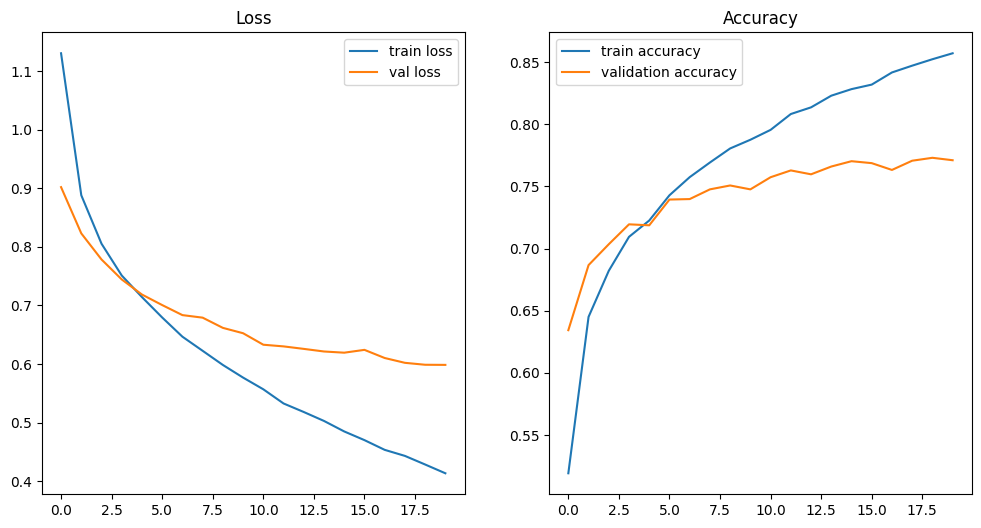

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
##. as you can see in the picture by changing batch size to 128 and changing th elearning rate in adam optimizer,
# the overfitting problem is solved

In [ ]:
## now i want to use another hyperparameter tunning which is data augmentation
## actually, it uses the batch size of 128 and changing the learning rate

In [ ]:
## In this code, I added various data augmentation techniques to the train_datagen object:
# such as rotation, width and height shifts, shear range, zoom range, and horizontal flip.
# These augmentations will help the model generalize better and reduce overfitting.

# **Data augmentation**

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 128

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes for ethnicities

# Define your optimizer with the adjusted learning rate
optimizer = Adam(learning_rate=0.00005)  # Adjusted learning rate

# Compile your model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.
Epoch 1/20
82/82 [==============================] - 58s 693ms/step - loss: 1.2155 - accuracy: 0.4902 - val_loss: 0.9733 - val_accuracy: 0.6203
Epoch 2/20
82/82 [==============================] - 54s 659ms/step - loss: 1.0055 - accuracy: 0.5850 - val_loss: 0.8975 - val_accuracy: 0.6398
Epoch 3/20
82/82 [==============================] - 55s 666ms/step - loss: 0.9644 - accuracy: 0.6061 - val_loss: 0.8629 - val_accuracy: 0.6512
Epoch 4/20
82/82 [==============================] - 54s 653ms/step - loss: 0.9228 - accuracy: 0.6235 - val_loss: 0.8288 - val_accuracy: 0.6766
Epoch 5/20
82/82 [==============================] - 54s 663ms/step - loss: 0.9061 - accuracy: 0.6349 - val_loss: 0.8143 - val_accuracy: 0.6746
Epoch 6/20
82/82 [==============================] - 54s 653ms/step - loss: 0.8893 - accuracy: 0.6402 - val_loss: 0.7878 - val_accuracy: 0.6922
Epoch 7/20
82/82 [==============================] - 54s 6

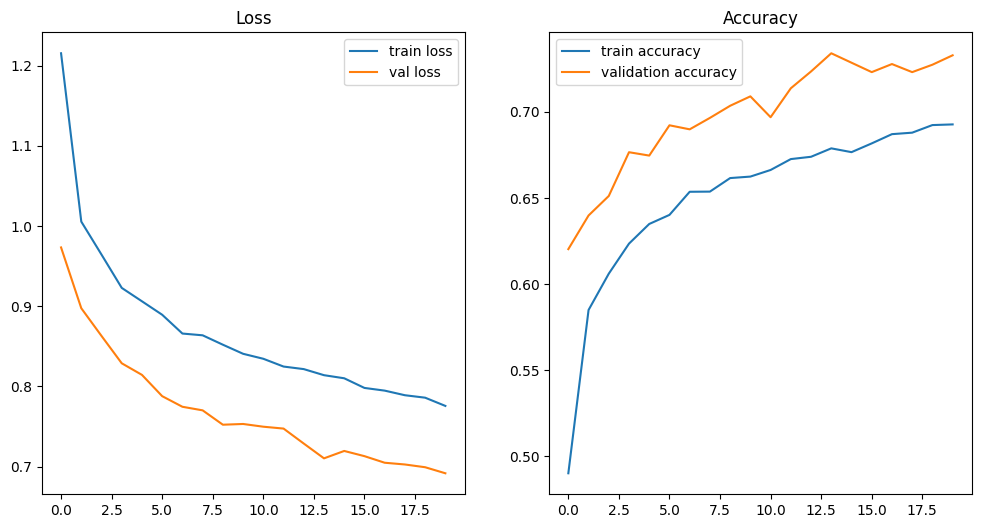

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
# as you can see in the pictures the overfitting problem solved
## now i just want to change the epochs to 30 to see

# **Epoch = 30**

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/30
82/82 [==============================] - 56s 673ms/step - loss: 0.7691 - accuracy: 0.6968 - val_loss: 0.6888 - val_accuracy: 0.7398
Epoch 2/30
82/82 [==============================] - 58s 712ms/step - loss: 0.7747 - accuracy: 0.6957 - val_loss: 0.6808 - val_accuracy: 0.7340
Epoch 3/30
82/82 [==============================] - 55s 666ms/step - loss: 0.7808 - accuracy: 0.6936 - val_loss: 0.6930 - val_accuracy: 0.7262
Epoch 4/30
82/82 [==============================] - 56s 682ms/step - loss: 0.7646 - accuracy: 0.6995 - val_loss: 0.6763 - val_accuracy: 0.7406
Epoch 5/30
82/82 [==============================] - 55s 665ms/step - loss: 0.7616 - accuracy: 0.7003 - val_loss: 0.6730 - val_accuracy: 0.7367
Epoch 6/30
82/82 [==============================] - 57s 696ms/step - loss: 0.7660 - accuracy: 0.6984 - val_loss: 0.6766 - val_accuracy: 0.7395
Epoch 7/30
82/82 [==============================] - 56s 685ms/step - loss: 0.7566 - accuracy: 0.7020 - val_loss: 0.6752 - val_accuracy: 0.7391

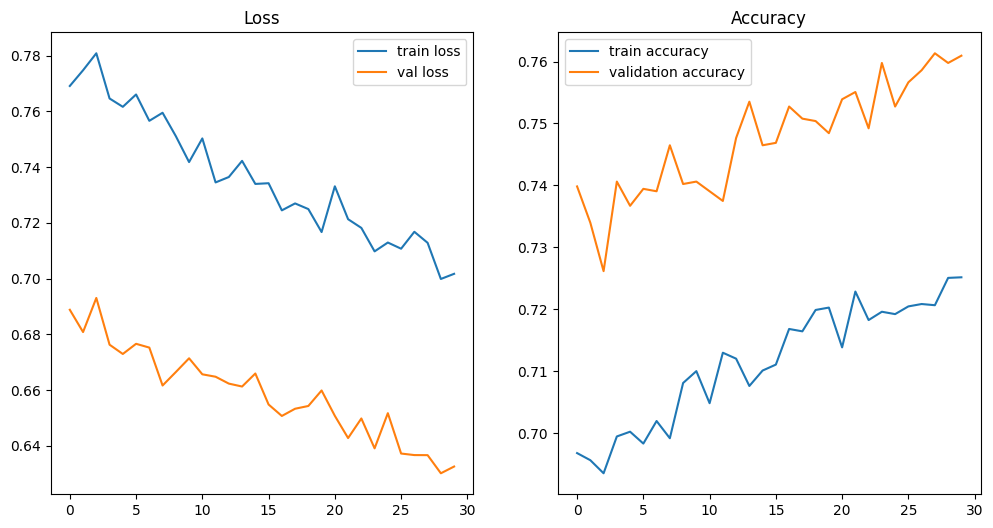

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
########################################################################################################################################

In [ ]:
#### chizi ke ezafe erick to codash anjam dade ke darvaghe fine tunning hast ruye layeha:

In [ ]:
# Add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Make VGG16 base model trainable for the last few layers
vgg.trainable = True
set_trainable = False
for layer in vgg.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        set_trainable = True
    layer.trainable = set_trainable

In [ ]:
## prediction:

# 3 model mishe predict kard ke codasho mizaram inja

In [ ]:
# 1-

from PIL import Image

def predict_ethnicity(image_path, model):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = test_transform(image).unsqueeze(0)

    # Predict ethnicity
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    predicted_class = predicted.item()
    predicted_ethnicity = ethnicity_classes[predicted_class]

    # Calculate percentage of each predicted label
    probabilities = torch.softmax(outputs, dim=1)[0]
    predicted_percentages = {ethnicity_classes[i]: probabilities[i].item() * 100 for i in range(len(ethnicity_classes))}

    return predicted_ethnicity, predicted_percentages

# Example usage:
image_path = '/content/specific_dataset/specific_dataset/asian/Claudia Kim.png'
predicted_ethnicity, predicted_percentages = predict_ethnicity(image_path, pretrained_model)
print('Predicted ethnicity:', predicted_ethnicity)
print('Predicted percentages:', predicted_percentages)


In [ ]:
# 2-

image_path = '/content/14.jpeg'  # Path to new image
predictions = predict_image(model, image_path)
confidence_levels = get_prediction_percentage(predictions)

print("Confidence levels:")
for label, confidence in confidence_levels.items():
    print(f"{label}: {confidence:.2f}%")

In [ ]:
# 3-

def predict_on_image(image_path, model):
    img = cv2.imread(image_path)
    if img is None:
        raise Exception(f"Failed to load the image at {image_path}. Check file format.")
    img = cv2.resize(img, (128, 128))  # Resize to the expected input size of the model
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    return categories[predicted_class_index]  # Return the predicted category


import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

new_sample_dir = "/content/Test2/Image Dataset"
categories = ['Age 5-15', 'Age 16-30', 'Age 31-45', 'Age 46-60', 'Age 61+']

for category in categories:
    category_path = os.path.join(new_sample_dir, category)
    if os.path.isdir(category_path):
        image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_files = random.sample(image_files, min(5, len(image_files)))
        for image_file in selected_files:
            image_path = os.path.join(category_path, image_file)
            try:
                predicted_age_class = predict_on_image(image_path, model)
                img_bgr = cv2.imread(image_path)
                img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
                cv2.putText(img_rgb, predicted_age_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

                plt.imshow(img_rgb)
                plt.title(f"Predicted: {predicted_age_class}")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error processing {image_path}: {str(e)}")